### Importing Libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Dataset

In [3]:
df = pd.read_csv('MD_agric_exam-4313.csv')

In [4]:
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


## Task 1: Number of unique crop types

In [6]:
len(df['Crop_type'].unique())

8

## Task 2: Maximum annual yield for 'wheat' crop

In [10]:
df[df['Crop_type'] == 'wheat'].sort_values(by='Annual_yield', ascending=False).head(1)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
671,2811,592.2369,805.8,-5.2,31.6,6.453941,0.458986,14.0,8.994376,wheat


## Task 3: Total rainfall for crops where average pollution is above 0.2

In [13]:
df[df['Pollution_level'] > 0.2]['Rainfall'].sum()

478902.6

## Task 4: Function to calculate temperature range for each field

In [35]:
def temp_range(field_id):
    filtered = df[df['Field_ID'] == field_id]
    return (filtered['Max_temperature_C'] - filtered['Min_temperature_C'])

In [36]:
temp_range(1458)

135    40.7
dtype: float64

In [37]:
temp_range(1895)

644    35.7
dtype: float64

In [38]:
temp_range(5443)

892    33.4
dtype: float64

## Task 5: What does the following code achieve

In [39]:
a = df['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop

print(c)

rice


#### It first filters out all unique crop type in an array 'a' then gets the mean minimum temperature of each crop type and then gets the crop with the least minimum temperature average

## Task 6: Calculate the total plot size for plots where pH is less than 5.5

In [55]:
round(df[df['pH'] < 5.5]['Plot_size'].sum(), 2)

1731.9

## Task 7: Create dataframe where `Min_temperature_C` < -5 and `Max_temperature_C` > 30. How many rows are in the dataset?

In [46]:
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]
filtered_df.shape

(319, 10)

## Task 8: Calculate the standard deviation of `Rainfall` for plots where `Plot_size` is larger than the median plot size of the dataset

In [52]:
median_plot_size = np.median(df['Plot_size'])
filtered_df = df[df['Plot_size'] > median_plot_size]
std_rainfall = np.std(filtered_df['Rainfall'], ddof=0)
round(std_rainfall, 2)

469.62

## Task 9: If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?

In [73]:
most_temp = df['Max_temperature_C'].mode().iloc[0]
least_crop = df['Crop_type'].value_counts().sort_values().index[0]

str(most_temp)[:3] + least_crop[-3:]

'30.ice'

## Task 10: Violin Plot visualizing `Annual_yield` across `Elevation` range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m)

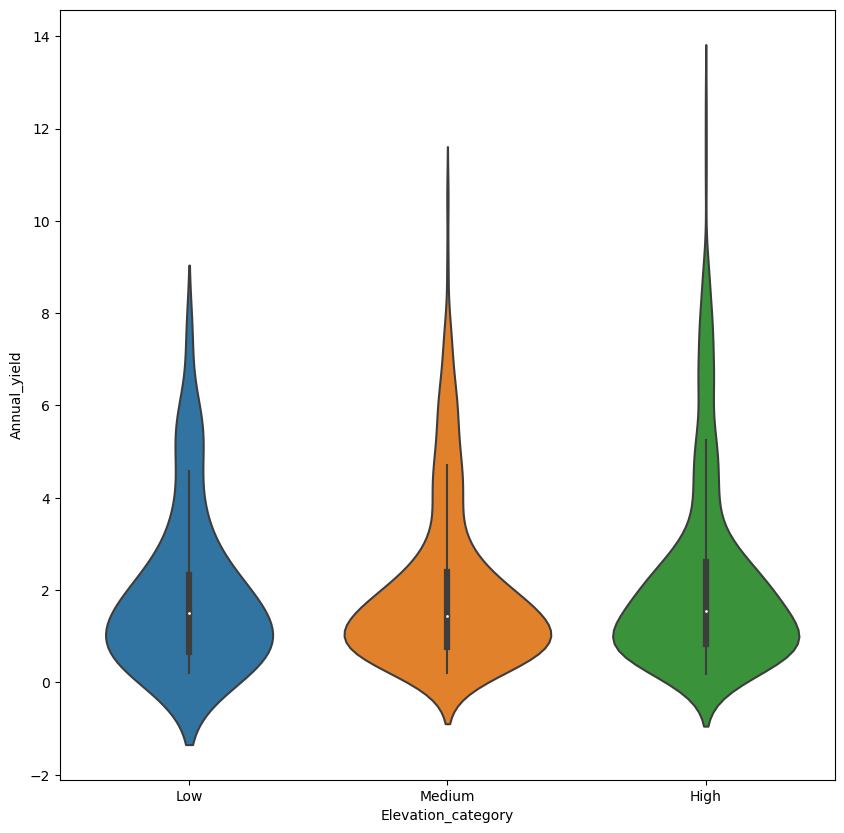

In [79]:
def categorise_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif elevation > 600:
        return 'High'
    else:
        return 'Medium'

df['Elevation_category'] = df['Elevation'].apply(categorise_elevation)

plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='Elevation_category', y='Annual_yield', order=['Low', 'Medium', 'High'])
plt.show()

## Task 11: Write a recursive function to sum the integer values for each unique crop type in the dataset, assuming each `Crop_type` contributes an integer value equal to its length

In [82]:
def crops_sum(crops):
    if len(crops) == 1:
        return len(crops[0])
    return len(crops[0]) + crops_sum(crops[1:])

unique_crops = df['Crop_type'].unique()
crops_sum(unique_crops)

42

## Task 12: Perform a t-test comparing the average `Annual_yield` between 'coffee' and 'banana' crop types. What is the p-value?

In [92]:
from scipy.stats import ttest_ind

coffee = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana = df[df['Crop_type'] == 'banana']['Annual_yield']
t_statistic, p_value = ttest_ind(coffee, banana, equal_var=False)
round(p_value, 3)

0.598